In [1]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [2]:
%cd /gdrive/MyDrive/Federated Learning/SAILER-main
!ls


/gdrive/MyDrive/Federated Learning/SAILER-main
data	      eval.py	models	     results	    train.py
dataset.py    LICENSE	__pycache__  trainer_og.py
deepatac.yml  model.py	README.md    trainer.py


In [3]:
#%load dataset.py
from dataset import *
from trainer import Trainer

In [4]:
!pip install ezdict

In [5]:
!pip install umap-learn datashader bokeh holoviews

In [6]:
import sys
from ezdict import EZDict
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
import matplotlib
import pandas as pd
from sklearn.feature_selection import mutual_info_regression as MIR

In [7]:
def get_cmap(n, name='tab10'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

cmap = get_cmap(10)

## Data Files
Files are named after simulation setting, signal to noise ratio and mean number of peaks per cell. Data are stored as sparse matrices in npz files. Cell labels are in txt files.

In [8]:
!ls ./data/SimATAC

merge_sim4.npz
merge_sim_labels4.csv
setting2_s0.35_f3000.SCAN-ATAC-Sim_labels.txt
setting2_s0.35_f3000.SCAN-ATAC-Sim.npz
setting2_s0.4_f5000.SCAN-ATAC-Sim_labels.txt
setting2_s0.4_f5000.SCAN-ATAC-Sim.npz


## Training

In [10]:
args = EZDict({
    "name": 'sim1_z10',
    'log': 'train_log.csv',
    'load_ckpt': False, 
    'cuda_dev': [0], #False
    'sample_batch': False,
    "max_epoch": 100,
    'start_epoch': 1,
    'batch_size': 100,
    'start_save': 98,
    'LAMBDA': 1,
    'conv': False,
    'model_type': 'inv',
    'data_type': 'simATAC',
    'lr': 1e-3, 
    'pos_w': 20,
    'weight_decay': 5e-4,
    'optimizer': 'adam',
    'z_dim': 10,
    'out_every': 20,
    'ckpt_dir': './models/',
    #simATAC
    'setting': 2,
    'signal': 0.4,
    'frags': 5000,
    'bin_size': 10000,
    #ATACbenchmark
    'cov': 1000,
    'clients':2,
    'file_name':"/gdrive/MyDrive/Federated Learning/Data/Varying_depth_Varying_rou/High.mean_10000/peakMat.VarLen.3000_2500_2000_1500_1000.rou0.8.mean10000.sd1.5.npz",
    'type_name':"/gdrive/MyDrive/Federated Learning/Data/Varying_depth_Varying_rou/High.mean_10000/cellLabel.VarLen.3000_2500_2000_1500_1000.rou0.8.mean10000.sd1.5.txt"
})

In [11]:
solver = Trainer(args)

Using cuda
Peak Matrix Loaded
Cell Labels Loaded
Finish loading in 4.426321506500244, data size (10000, 90635)
Model initiate
tensor([[ 7.6437e-04, -1.4145e-03, -5.3074e-04,  ...,  2.6495e-03,
          2.5495e-03, -2.5943e-03],
        [-1.7761e-03,  2.4395e-03,  1.7629e-03,  ...,  3.0116e-03,
         -3.0857e-03, -2.7950e-03],
        [ 1.4744e-03,  2.5944e-03, -9.5088e-05,  ...,  9.3537e-04,
         -8.7987e-04,  9.3809e-04],
        ...,
        [ 2.8815e-03, -3.2545e-03,  2.3688e-03,  ...,  3.1079e-03,
         -1.6316e-03, -1.2205e-03],
        [-3.6792e-04,  2.9820e-03,  3.0180e-03,  ...,  4.0972e-04,
          5.7633e-04,  1.3568e-03],
        [-4.5562e-04, -7.1316e-04, -1.6800e-03,  ..., -1.5535e-03,
         -1.1659e-03, -4.9142e-04]], device='cuda:0')
inv
Model initiate
tensor([[ 7.6437e-04, -1.4145e-03, -5.3074e-04,  ...,  2.6495e-03,
          2.5495e-03, -2.5943e-03],
        [-1.7761e-03,  2.4395e-03,  1.7629e-03,  ...,  3.0116e-03,
         -3.0857e-03, -2.7950e-03],


In [12]:
solver.warm_up()

  0%|          | 0/10 [00:07<?, ?it/s]

[50] vae_recon_loss:1.4170271158218384


 10%|█         | 1/10 [00:14<02:09, 14.35s/it]

[100] vae_recon_loss:1.3338537216186523


 10%|█         | 1/10 [00:21<02:09, 14.35s/it]

[150] vae_recon_loss:1.4111177921295166


 20%|██        | 2/10 [00:28<01:53, 14.24s/it]

[200] vae_recon_loss:1.3283311128616333


 20%|██        | 2/10 [00:36<01:53, 14.24s/it]

[250] vae_recon_loss:1.4094711542129517


 30%|███       | 3/10 [00:43<01:42, 14.58s/it]

[300] vae_recon_loss:1.3232712745666504


 30%|███       | 3/10 [00:51<01:42, 14.58s/it]

[350] vae_recon_loss:1.40973699092865


 40%|████      | 4/10 [00:58<01:27, 14.59s/it]

[400] vae_recon_loss:1.3225257396697998


 40%|████      | 4/10 [01:06<01:27, 14.59s/it]

[450] vae_recon_loss:1.4106367826461792


 50%|█████     | 5/10 [01:13<01:13, 14.78s/it]

[500] vae_recon_loss:1.3228752613067627


 50%|█████     | 5/10 [01:21<01:13, 14.78s/it]

[550] vae_recon_loss:1.4118285179138184


 60%|██████    | 6/10 [01:28<00:59, 14.93s/it]

[600] vae_recon_loss:1.3238842487335205


 60%|██████    | 6/10 [01:35<00:59, 14.93s/it]

[650] vae_recon_loss:1.4136037826538086


 70%|███████   | 7/10 [01:42<00:43, 14.45s/it]

[700] vae_recon_loss:1.324202060699463


 70%|███████   | 7/10 [01:49<00:43, 14.45s/it]

[750] vae_recon_loss:1.4145524501800537


 80%|████████  | 8/10 [01:55<00:28, 14.24s/it]

[800] vae_recon_loss:1.325165867805481


 80%|████████  | 8/10 [02:03<00:28, 14.24s/it]

[850] vae_recon_loss:1.4154229164123535


 90%|█████████ | 9/10 [02:10<00:14, 14.33s/it]

[900] vae_recon_loss:1.326210618019104


 90%|█████████ | 9/10 [02:19<00:14, 14.33s/it]

[950] vae_recon_loss:1.41693913936615


100%|██████████| 10/10 [02:25<00:00, 14.60s/it]

[1000] vae_recon_loss:1.3277615308761597


100%|██████████| 10/10 [02:28<00:00, 14.87s/it]

[Warmup Finished]


In [13]:
solver.inv_train()

  0%|          | 0/99 [00:00<?, ?it/s]

Inv Training started


  1%|          | 1/99 [00:14<23:59, 14.69s/it]

[1], iter 101


  2%|▏         | 2/99 [00:27<23:03, 14.27s/it]

[2], iter 201


  3%|▎         | 3/99 [00:40<22:10, 13.86s/it]

[3], iter 301


  4%|▍         | 4/99 [00:55<22:31, 14.23s/it]

[4], iter 401


  5%|▌         | 5/99 [01:10<22:37, 14.44s/it]

[5], iter 501


  6%|▌         | 6/99 [01:24<22:00, 14.20s/it]

[6], iter 601


  7%|▋         | 7/99 [01:37<21:17, 13.88s/it]

[7], iter 701


  8%|▊         | 8/99 [01:51<20:58, 13.83s/it]

[8], iter 801


  9%|▉         | 9/99 [02:06<21:10, 14.12s/it]

[9], iter 901


 10%|█         | 10/99 [02:19<20:32, 13.84s/it]

[10], iter 1001


 11%|█         | 11/99 [02:33<20:19, 13.86s/it]

[11], iter 1101


 12%|█▏        | 12/99 [02:46<19:53, 13.71s/it]

[12], iter 1201


 13%|█▎        | 13/99 [03:00<19:42, 13.75s/it]

[13], iter 1301


 14%|█▍        | 14/99 [03:15<19:49, 14.00s/it]

[14], iter 1401


 15%|█▌        | 15/99 [03:29<19:38, 14.02s/it]

[15], iter 1501


 16%|█▌        | 16/99 [03:42<19:16, 13.93s/it]

[16], iter 1601


 17%|█▋        | 17/99 [03:55<18:41, 13.68s/it]

[17], iter 1701


 18%|█▊        | 18/99 [04:09<18:18, 13.56s/it]

[18], iter 1801


 19%|█▉        | 19/99 [04:22<17:53, 13.42s/it]

[19], iter 1901


 20%|██        | 20/99 [04:36<17:47, 13.51s/it]

[20], iter 2001


 21%|██        | 21/99 [04:49<17:33, 13.51s/it]

[21], iter 2101


 22%|██▏       | 22/99 [05:04<17:57, 13.99s/it]

[22], iter 2201


 23%|██▎       | 23/99 [05:19<18:02, 14.24s/it]

[23], iter 2301


 24%|██▍       | 24/99 [05:33<17:45, 14.20s/it]

[24], iter 2401


 25%|██▌       | 25/99 [05:47<17:22, 14.09s/it]

[25], iter 2501


 26%|██▋       | 26/99 [06:01<17:16, 14.21s/it]

[26], iter 2601


 27%|██▋       | 27/99 [06:16<17:05, 14.24s/it]

[27], iter 2701


 28%|██▊       | 28/99 [06:31<17:05, 14.44s/it]

[28], iter 2801


 29%|██▉       | 29/99 [06:44<16:35, 14.23s/it]

[29], iter 2901


 30%|███       | 30/99 [06:58<16:17, 14.16s/it]

[30], iter 3001


 31%|███▏      | 31/99 [07:12<15:51, 13.99s/it]

[31], iter 3101


 32%|███▏      | 32/99 [07:24<15:00, 13.44s/it]

[32], iter 3201


 33%|███▎      | 33/99 [07:36<14:22, 13.07s/it]

[33], iter 3301


 34%|███▍      | 34/99 [07:48<13:51, 12.79s/it]

[34], iter 3401


 35%|███▌      | 35/99 [08:02<13:45, 12.90s/it]

[35], iter 3501


 36%|███▋      | 36/99 [08:15<13:36, 12.96s/it]

[36], iter 3601


 37%|███▋      | 37/99 [08:28<13:36, 13.17s/it]

[37], iter 3701


 38%|███▊      | 38/99 [08:42<13:30, 13.28s/it]

[38], iter 3801


 39%|███▉      | 39/99 [08:55<13:19, 13.33s/it]

[39], iter 3901


 40%|████      | 40/99 [09:09<13:07, 13.34s/it]

[40], iter 4001


 41%|████▏     | 41/99 [09:22<12:49, 13.27s/it]

[41], iter 4101


 42%|████▏     | 42/99 [09:35<12:33, 13.22s/it]

[42], iter 4201


 43%|████▎     | 43/99 [09:49<12:38, 13.55s/it]

[43], iter 4301


 44%|████▍     | 44/99 [10:05<13:02, 14.23s/it]

[44], iter 4401


 45%|████▌     | 45/99 [10:19<12:37, 14.02s/it]

[45], iter 4501


 46%|████▋     | 46/99 [10:32<12:13, 13.84s/it]

[46], iter 4601


 47%|████▋     | 47/99 [10:46<12:03, 13.91s/it]

[47], iter 4701


 48%|████▊     | 48/99 [11:01<11:58, 14.08s/it]

[48], iter 4801


 49%|████▉     | 49/99 [11:14<11:40, 14.01s/it]

[49], iter 4901


 51%|█████     | 50/99 [11:28<11:24, 13.97s/it]

[50], iter 5001


 52%|█████▏    | 51/99 [11:42<11:07, 13.90s/it]

[51], iter 5101


 53%|█████▎    | 52/99 [11:56<10:49, 13.82s/it]

[52], iter 5201


 54%|█████▎    | 53/99 [12:10<10:45, 14.03s/it]

[53], iter 5301


 55%|█████▍    | 54/99 [12:24<10:25, 13.91s/it]

[54], iter 5401


 56%|█████▌    | 55/99 [12:39<10:27, 14.26s/it]

[55], iter 5501


 57%|█████▋    | 56/99 [12:54<10:20, 14.43s/it]

[56], iter 5601


 58%|█████▊    | 57/99 [13:09<10:14, 14.64s/it]

[57], iter 5701


 59%|█████▊    | 58/99 [13:23<09:49, 14.37s/it]

[58], iter 5801


 60%|█████▉    | 59/99 [13:35<09:15, 13.88s/it]

[59], iter 5901


 61%|██████    | 60/99 [13:49<08:56, 13.75s/it]

[60], iter 6001


 62%|██████▏   | 61/99 [14:02<08:38, 13.64s/it]

[61], iter 6101


 63%|██████▎   | 62/99 [14:15<08:20, 13.52s/it]

[62], iter 6201


 64%|██████▎   | 63/99 [14:30<08:15, 13.76s/it]

[63], iter 6301


 65%|██████▍   | 64/99 [14:44<08:03, 13.82s/it]

[64], iter 6401


 66%|██████▌   | 65/99 [14:59<08:00, 14.14s/it]

[65], iter 6501


 67%|██████▋   | 66/99 [15:13<07:45, 14.10s/it]

[66], iter 6601


 68%|██████▊   | 67/99 [15:27<07:31, 14.12s/it]

[67], iter 6701


 69%|██████▊   | 68/99 [15:41<07:14, 14.02s/it]

[68], iter 6801


 70%|██████▉   | 69/99 [15:54<06:56, 13.89s/it]

[69], iter 6901


 71%|███████   | 70/99 [16:08<06:41, 13.84s/it]

[70], iter 7001


 72%|███████▏  | 71/99 [16:22<06:27, 13.83s/it]

[71], iter 7101


 73%|███████▎  | 72/99 [16:36<06:15, 13.90s/it]

[72], iter 7201


 74%|███████▎  | 73/99 [16:49<05:58, 13.80s/it]

[73], iter 7301


 75%|███████▍  | 74/99 [17:03<05:46, 13.87s/it]

[74], iter 7401


 76%|███████▌  | 75/99 [17:16<05:23, 13.49s/it]

[75], iter 7501


 77%|███████▋  | 76/99 [17:29<05:07, 13.38s/it]

[76], iter 7601


 78%|███████▊  | 77/99 [17:42<04:52, 13.29s/it]

[77], iter 7701


 79%|███████▉  | 78/99 [17:55<04:35, 13.10s/it]

[78], iter 7801


 80%|███████▉  | 79/99 [18:07<04:18, 12.95s/it]

[79], iter 7901


 81%|████████  | 80/99 [18:21<04:12, 13.27s/it]

[80], iter 8001


 82%|████████▏ | 81/99 [18:35<04:02, 13.47s/it]

[81], iter 8101


 83%|████████▎ | 82/99 [18:50<03:53, 13.73s/it]

[82], iter 8201


 84%|████████▍ | 83/99 [19:04<03:43, 13.98s/it]

[83], iter 8301


 85%|████████▍ | 84/99 [19:19<03:31, 14.12s/it]

[84], iter 8401


 86%|████████▌ | 85/99 [19:32<03:16, 14.03s/it]

[85], iter 8501


 87%|████████▋ | 86/99 [19:46<03:01, 13.93s/it]

[86], iter 8601


 88%|████████▊ | 87/99 [20:00<02:47, 13.93s/it]

[87], iter 8701


 89%|████████▉ | 88/99 [20:14<02:33, 13.99s/it]

[88], iter 8801


 90%|████████▉ | 89/99 [20:28<02:18, 13.90s/it]

[89], iter 8901


 91%|█████████ | 90/99 [20:42<02:05, 13.93s/it]

[90], iter 9001


 92%|█████████▏| 91/99 [20:56<01:51, 13.95s/it]

[91], iter 9101


 93%|█████████▎| 92/99 [21:10<01:37, 13.96s/it]

[92], iter 9201


 94%|█████████▍| 93/99 [21:24<01:24, 14.14s/it]

[93], iter 9301


 95%|█████████▍| 94/99 [21:37<01:09, 13.80s/it]

[94], iter 9401


 96%|█████████▌| 95/99 [21:51<00:54, 13.66s/it]

[95], iter 9501


 97%|█████████▋| 96/99 [22:04<00:40, 13.43s/it]

[96], iter 9601


 98%|█████████▊| 97/99 [22:17<00:26, 13.32s/it]

[97], iter 9701


 99%|█████████▉| 98/99 [22:32<00:13, 13.80s/it]

[98], iter 9801


100%|██████████| 99/99 [22:47<00:00, 14.11s/it]

[99], iter 9901


100it [23:01, 14.36s/it]

[100], iter 10001


100it [23:04, 13.85s/it]

[Inv Training Finished]


## Cyclical Annealing Schedule

See [here](https://www.microsoft.com/en-us/research/blog/less-pain-more-gain-a-simple-method-for-vae-training-with-less-of-that-kl-vanishing-agony/) for a blog on how to deal with kl vanishing.
![image](https://www.microsoft.com/en-us/research/uploads/prod/2019/04/equation.png)

### (a) monotonic schedule vs (b) the cyclical schedule
![image](https://www.microsoft.com/en-us/research/uploads/prod/2019/04/Annealing-with-the-monotonic-schedule-768x498.png)
### Example results
![image](https://www.microsoft.com/en-us/research/uploads/prod/2019/04/figure-4-1.png)
![image](https://www.microsoft.com/en-us/research/uploads/prod/2019/04/figure-4.png)

## Traing log

In [12]:
log = pd.read_csv('models/sim1_z10/invtrain_log.csv')

FileNotFoundError: ignored

In [ ]:
log

In [ ]:
plt.plot(log.kl[100:])

In [ ]:
plt.plot(log.bce)

## Visualize latent embedding
Visualize latent embedding of cells with UMAP. Cells are colored by ground truth cell types.

In [14]:
latent, labels, depth = solver.encode_adv()

100it [00:24,  4.09it/s]


In [15]:
result = latent.numpy()

In [16]:
l = pd.DataFrame(labels, columns=['celltype'])

In [17]:
reducer = umap.UMAP(random_state=123)
X_embedded = reducer.fit_transform(result)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


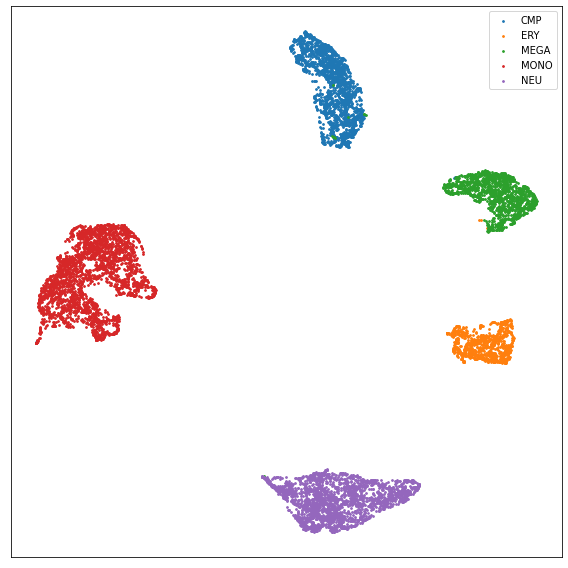

In [18]:
plt.figure(figsize=(8, 8))
for i, c in enumerate(np.unique(l)):
    mask = (l == c).values.flatten()
    plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1], label=c, s=3, color=cmap(i))
    plt.xticks([], [])
    plt.yticks([], [])
plt.tight_layout()
plt.legend()


## Visualize depth distribution on latent embedding

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(X_embedded[:, 0], 
            X_embedded[:, 1], 
            s=1, 
            c=np.array(depth),
            norm=matplotlib.colors.LogNorm(),
            cmap='pink'
            )
plt.xticks([], [])
plt.yticks([], [])
cbar = plt.colorbar()
cbar.remove()
plt.tight_layout()

## Mutual Information
Caculate mean mutual information between latent embedding and read depth.

In [ ]:
mi = MIR(result, depth)
print(mi.mean())